<font size=5>**SENTIMENT ANALYSIS ON AMAZON BEAUTY PRODUCTS REVIEW DATA**</font>

In [48]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
#pip install openpyxl

**DATA OVERVIEW**

In [50]:
#read file to a dataframe
amazon_df = pd.read_excel('C:/Users/USER/Documents/SEM 3/DEEPLEARNING-DAB311/DAB311/.DAB311venv/CODE/merged_data.xlsx')

In [51]:
#Displaying top 2 rows in dataframe
amazon_df.head(2)

,rating,title_x,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,title_y,average_rating,rating_number
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,Herbivore - Natural Sea Mist Texturizing Salt ...,4.3,384
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,56


In [52]:
# Displays a summary of the DataFrame
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             200000 non-null  int64  
 1   title_x            199958 non-null  object 
 2   text               199965 non-null  object 
 3   images             200000 non-null  object 
 4   asin               200000 non-null  object 
 5   parent_asin        200000 non-null  object 
 6   user_id            200000 non-null  object 
 7   timestamp          200000 non-null  int64  
 8   helpful_vote       200000 non-null  int64  
 9   verified_purchase  200000 non-null  bool   
 10  title_y            199975 non-null  object 
 11  average_rating     200000 non-null  float64
 12  rating_number      200000 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 18.5+ MB


In [53]:
# Prints the first five values of the 'timestamp' column and displays its data type
print(amazon_df['timestamp'].head())
print(amazon_df['timestamp'].dtype)

0    1588687728923
1    1588615855070
2    1589665266052
3    1643393630220
4    1609322563534
Name: timestamp, dtype: int64
int64


In [54]:
#Check for number of unique values in each column in dataframe
amazon_df.nunique()

rating                    5
title_x              121476
text                 187757
images                14458
asin                  62380
parent_asin           60726
user_id              168659
timestamp            199189
helpful_vote            171
verified_purchase         2
title_y               59843
average_rating           41
rating_number          1355
dtype: int64

In [55]:
#check for null values in our data
amazon_df.isnull().sum()

rating                0
title_x              42
text                 35
images                0
asin                  0
parent_asin           0
user_id               0
timestamp             0
helpful_vote          0
verified_purchase     0
title_y              25
average_rating        0
rating_number         0
dtype: int64

**PRE-PROCESSING**

In [56]:
# change column names title_x to review_title and title_y to product_title

amazon_df = amazon_df.rename(columns={'title_x': 'review_title', 'title_y': 'product_title'})

In [57]:
# Converts the 'timestamp' column to a datetime format using milliseconds as the time unit

amazon_df['timestamp'] = pd.to_datetime(amazon_df['timestamp'], unit='ms')


In [58]:
# Display the first five entries of the 'timestamp' column and its data type after conversion
print(amazon_df['timestamp'].head())
print(amazon_df['timestamp'].dtype)

0   2020-05-05 14:08:48.923
1   2020-05-04 18:10:55.070
2   2020-05-16 21:41:06.052
3   2022-01-28 18:13:50.220
4   2020-12-30 10:02:43.534
Name: timestamp, dtype: datetime64[ns]
datetime64[ns]


**On which date we had maximum number of Reviews?**

In [59]:
# Convert the timestamp to date only
amazon_df['date'] = amazon_df['timestamp'].dt.date

# Group by date and count the number of reviews
date_counts = amazon_df.groupby('date').size()

# Find the date with the maximum number of reviews
max_date = date_counts.idxmax()

print(f"The date with the maximum number of reviews is: {max_date}")

The date with the maximum number of reviews is: 2020-12-28


**DEALING WITH NULL VALUES**

In [60]:
#check for null values in our data
amazon_df.isnull().sum()

rating                0
review_title         42
text                 35
images                0
asin                  0
parent_asin           0
user_id               0
timestamp             0
helpful_vote          0
verified_purchase     0
product_title        25
average_rating        0
rating_number         0
date                  0
dtype: int64

The text column is critical for sentiment analysis. Missing values here reduce the data quality.Since this column is vital, its better to drop rows where text is null.

In [61]:
# Drop rows where 'text' is null
amazon_df = amazon_df.dropna(subset=['text'])

# Verify the changes
print(amazon_df.isnull().sum())

rating                0
review_title         29
text                  0
images                0
asin                  0
parent_asin           0
user_id               0
timestamp             0
helpful_vote          0
verified_purchase     0
product_title        25
average_rating        0
rating_number         0
date                  0
dtype: int64


After removing the rows having null values in 'text' column, we have 29 rows having review_title column null and 25 rows having product_title null.Titles are typically brief summaries of the review and products and may not be critical for sentiment analysis as the text column contains the review body.

In [62]:
#Replace null titles with "No Title" to retain the row
amazon_df['review_title']=amazon_df['review_title'].fillna('No Title')
amazon_df['product_title']=amazon_df['product_title'].fillna('No Title')

In [63]:
#Checking for null values
print(amazon_df.isnull().sum())

rating               0
review_title         0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
product_title        0
average_rating       0
rating_number        0
date                 0
dtype: int64


**CHECK FOR OUTLIERS**

In [64]:
# check all the  value counts  in columns rating,helpful_vote,verified_purchase,
pd.set_option('display.max_rows', None)
# Check value counts for specified columns
for col in ['rating', 'helpful_vote', 'verified_purchase']:
    print(f"Value counts for column '{col}':")
    print(amazon_df[col].value_counts())
    print("-" * 20)

Value counts for column 'rating':
rating
5    121752
4     25323
1     22924
3     17809
2     12157
Name: count, dtype: int64
--------------------
Value counts for column 'helpful_vote':
helpful_vote
0      145147
1       28685
2       10108
3        4800
4        2868
5        1782
6        1174
7         872
8         692
9         519
10        414
11        331
12        295
13        238
14        192
15        162
16        156
17        137
18        111
19        110
20         95
22         66
21         60
23         58
24         54
27         45
25         43
30         39
26         38
31         33
32         31
28         31
29         28
33         25
40         25
42         24
35         23
34         21
41         19
36         19
37         18
43         15
51         14
44         13
54         11
38         11
47          9
39          9
58          9
45          9
53          9
65          8
48          8
62          8
49          8
71          7
55          7
6

**EDA ON AMAZON REVIEW DATA**

**1. Basic Data Understanding**

In [65]:
# Print the shape (number of rows and columns) of DataFrame
print(amazon_df.shape)

(199965, 14)


**2. Check for Duplicates**

In [66]:
#check for duplicate values
print(amazon_df.duplicated().sum())

798


In [67]:
#dropping duplicate values
amazon_df = amazon_df.drop_duplicates()

**3. Univariate Analysis**

**a. Distribution of Customer Ratings**

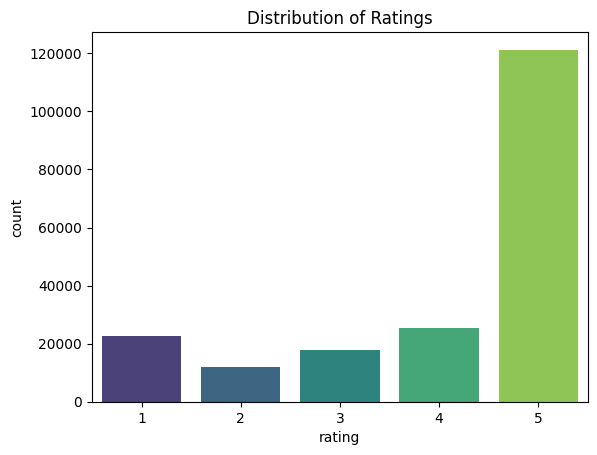

In [68]:
#Distribution of Ratings
sns.countplot(x='rating', data=amazon_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

The plot reveals that a significant majority of ratings are 5, suggesting a high level of satisfaction or approval from the respondents

In [69]:
#Mean and Median Rating
print(amazon_df['rating'].mean())
print(amazon_df['rating'].median())

4.054567272690757
5.0


The mean rating is approximately 4.05, indicating that most reviews are positive but slightly skewed by lower ratings. The median rating is 5.0, showing that the majority of customers gave the highest rating, suggesting overall high satisfaction with the products.

**b) Word Count Distribution-title  & text**

In [70]:
#Word Count Analysis:
amazon_df['title_word_count'] = amazon_df['review_title'].apply(lambda x: len(str(x).split()))
amazon_df['text_word_count'] = amazon_df['text'].apply(lambda x: len(str(x).split()))
print('Mean of Review title and Review Text')
print(amazon_df[['title_word_count', 'text_word_count']].mean())
print('Standard Deviation of Review title and Review Text')
print(amazon_df[['title_word_count', 'text_word_count']].std())

Mean of Review title and Review Text
title_word_count     3.945829
text_word_count     36.874763
dtype: float64
Standard Deviation of Review title and Review Text
title_word_count     3.104429
text_word_count     51.889961
dtype: float64


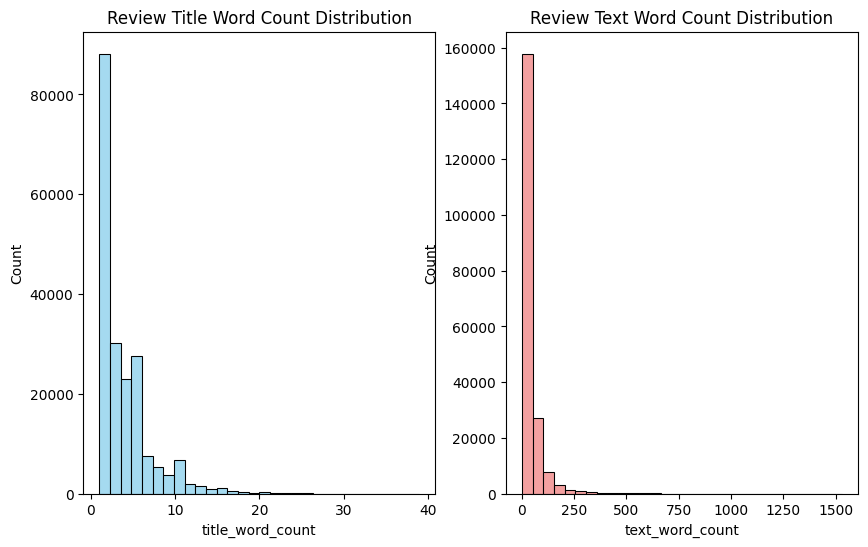

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

# Plot the histogram for the word count distribution of review titles
sns.histplot(amazon_df['title_word_count'], bins=30, ax=ax[0], color='skyblue')
ax[0].set_title('Review Title Word Count Distribution')
# Plot the histogram for the word count distribution of review texts
sns.histplot(amazon_df['text_word_count'], bins=30, ax=ax[1], color='lightcoral')
ax[1].set_title('Review Text Word Count Distribution')

plt.show()

<b>Title:</b><br>
<b>Mean</b>: On average, titles have about 4 words, suggesting that most titles are concise summaries of the reviews.<br>
<b>Standard Deviation :</b> Titles vary moderately in length, with some being much shorter or longer than average.<br>
<b>Review Text </b><br>
<b>Mean:</b> On average, review texts contain about 37 words, reflecting moderately detailed reviews.<br>
<b>Standard Deviation: </b>Review lengths vary widely, with some very short and others very detailed.

**c) Analyzing helpful_vote column**

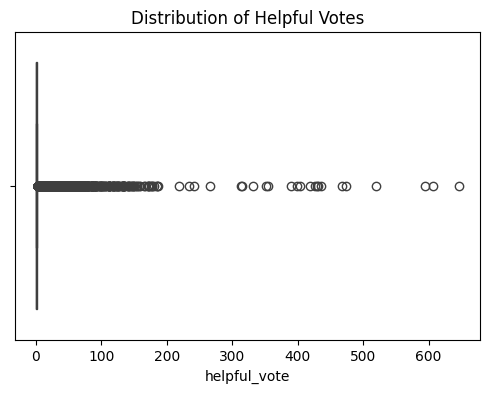

In [72]:
# Plot the distribution of 'helpful_vote'
plt.figure(figsize=(6,4))
sns.boxplot(x='helpful_vote', data=amazon_df)
plt.title('Distribution of Helpful Votes')
plt.show()

<b>Low Median and Right Skew:</b> The median helpful votes are near zero, and the distribution is heavily right-skewed, indicating most reviews receive few helpful votes, with a small number receiving significantly higher votes.<br>
<b>Outliers:</b> Reviews with up to 600 helpful votes are outliers, highlighting the impact of a few highly useful reviews.

In [73]:
# Remove rows where 'helpful_vote' is greater than 200
amazon_df = amazon_df[amazon_df['helpful_vote'] <= 200]

**d. Distribution of Verified and Non-Verified Purchases in Reviews**

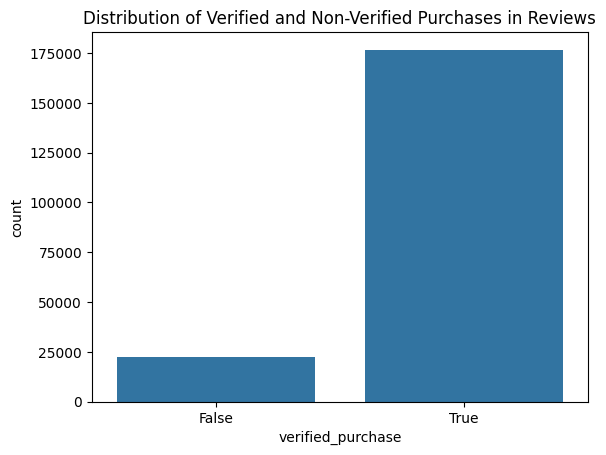

In [74]:
#Count and Proportion of Verified vs. Non-Verified Purchases:
sns.countplot(x='verified_purchase', data=amazon_df)
plt.title('Distribution of Verified and Non-Verified Purchases in Reviews')
plt.show()

This visual indicates that the vast majority of purchases are verified, highlighting a significant difference between the two categories. This could suggest a high level of buyer trust and assurance in verified purchases.

**e)Distribution of Reviews with Images**

In [75]:
# Define a function to check if the 'images' column contains a valid image URL
def has_image_url(image_str):
    # Check if the input is a string and contains 'http', indicating a URL
    if isinstance(image_str, str) and 'http' in image_str:
        return 1
    else:
        return 0

# The new column will indicate whether each review has an associated image URL (1 for yes, 0 for no)
amazon_df['has_image'] = amazon_df['images'].apply(has_image_url)

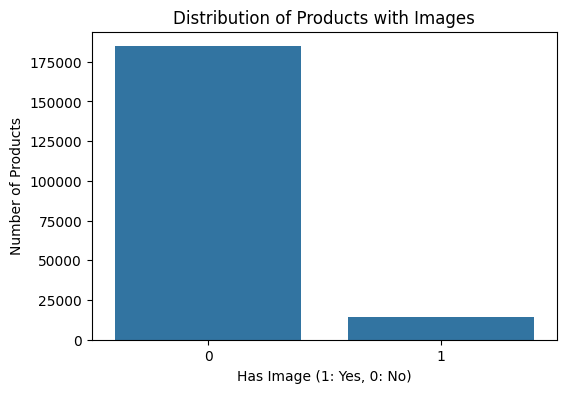

In [76]:
# Plot the 'has_image' column
plt.figure(figsize=(6,4))
sns.countplot(x='has_image', data=amazon_df)
plt.title('Distribution of Products with Images')
plt.xlabel('Has Image (1: Yes, 0: No)')
plt.ylabel('Number of Products')
plt.show()

In [77]:
# Perform aggregation on the 'helpful_vote' column to calculate mean, median, and count for each group
image_stats = amazon_df.groupby('has_image')[['helpful_vote']].agg(['mean', 'median', 'count'])
print(image_stats)

          helpful_vote               
                  mean median   count
has_image                            
0             0.795797    0.0  184699
1             2.520042    0.0   14445


<b>Helpful Votes:</b>

Reviews with images have a higher average of helpful votes than those without images (2.52 vs. 0.79), suggesting that reviews with images might be perceived as more helpful by other users.
However, the median helpful vote for both groups is 0.0, indicating that most reviews (whether with or without images) are not marked as helpful by the majority of users. This could imply that helpful votes are not always given freely and might be more selective.<br>


**f) Average Rating Distribution**

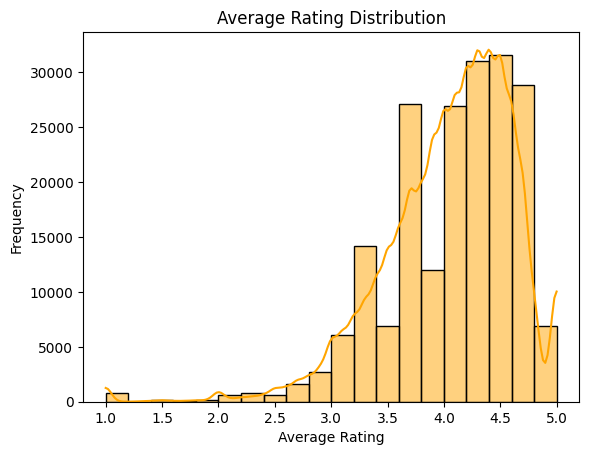

In [78]:
#Histogram to visualize the distribution of the 'average_rating' column
sns.histplot(amazon_df['average_rating'], bins=20, color='orange', kde=True)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

The histogram with an overlaid line plot illustrates the Average Rating Distribution. Most ratings cluster between 3.0 and 5.0, with a sharp increase from 2.5 to 4.0. The peak frequency is at 4.5, indicating that most products receive higher ratings, followed by a sharp decline beyond this point. This positive bias in ratings highlights a tendency for users to leave favorable reviews, reflecting overall satisfaction.

**Bi-Variate Analysis**

**a)Trend of Reviews Over the Years**

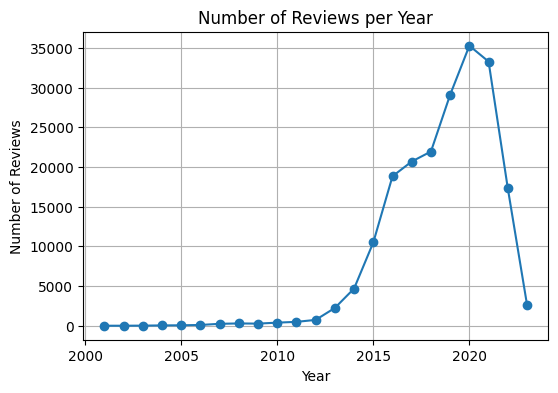

In [79]:
# Extract the year from the timestamp
amazon_df['year'] = amazon_df['timestamp'].dt.year

# Group by year and count the number of reviews
yearly_review_counts = amazon_df.groupby('year').size()

# Create the plot
plt.figure(figsize=(6,4))
plt.plot(yearly_review_counts.index, yearly_review_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Year')
plt.grid(True)
plt.show()

Rise in Reviews (2013-2020, peaking in 2020):<br>



*   The sharp increase leading up to 2020 could reflect the growing popularity of online shopping, which became even more pronounced during the COVID-19 pandemic. With lockdowns and restrictions, many customers turned to e-commerce platforms like Amazon for their beauty product needs.
*   Increased time at home may have encouraged self-care routines, leading to higher interest in beauty products.<br><br>

Decline in Reviews (2021-2022):

* As restrictions eased and physical stores reopened, customers may have shifted back to in-store shopping for beauty products, reducing online purchases and reviews.
* Economic uncertainty and shifts in consumer priorities post-pandemic could also have impacted spending on non-essential items like beauty products.




**b) Distribution of Helpful Votes for Each Rating Level**

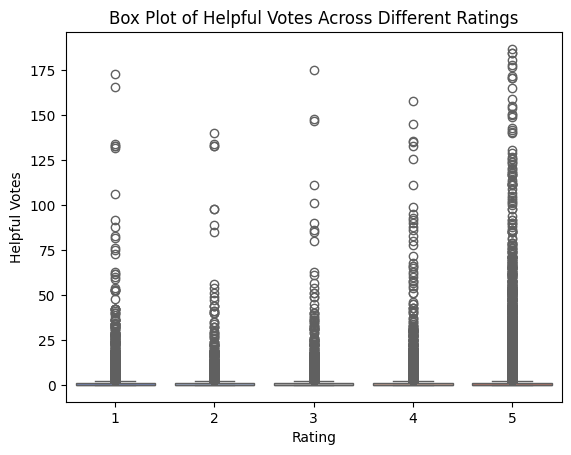

In [80]:
#Box plot to visualize the distribution of 'helpful_vote' across different 'rating' values
sns.boxplot(data=amazon_df, x='rating', y='helpful_vote', palette='coolwarm')
plt.title('Box Plot of Helpful Votes Across Different Ratings')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes')
plt.show()

The scatter plot reveals that higher-rated reviews (4 and 5) often receive more helpful votes, suggesting they are viewed as more useful or trustworthy. In contrast, lower-rated reviews (1, 2, and 3) generally attract fewer helpful votes, indicating they may be less valued by users. This highlights a tendency for positive experiences to resonate more with the community.

**c) Relationship Between Rating and Text Word Count in Reviews**

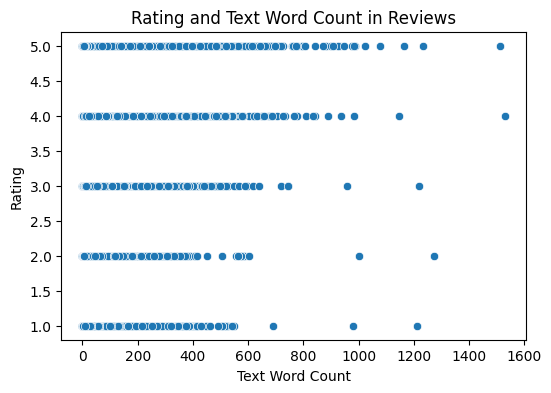

In [81]:
# Scatter plot to visualize the relationship between text word count and rating
plt.figure(figsize=(6,4))
sns.scatterplot(x='text_word_count', y='rating', data=amazon_df)
plt.title('Rating and Text Word Count in Reviews')
plt.xlabel('Text Word Count')
plt.ylabel('Rating')
plt.show()

The "Rating vs. Text Word Count" plot reveals a relationship between review length and user ratings. High ratings (4.0–5.0) show diverse word counts, from concise to detailed reviews, suggesting satisfied users vary in how much feedback they provide. Conversely, lower ratings (1.0–2.0) cluster around shorter reviews, indicating dissatisfied users often leave brief, direct comments. This pattern suggests that longer reviews may provide richer feedback, while shorter ones are more likely to convey dissatisfaction succinctly.

**d) Top Products by Helpful Votes**

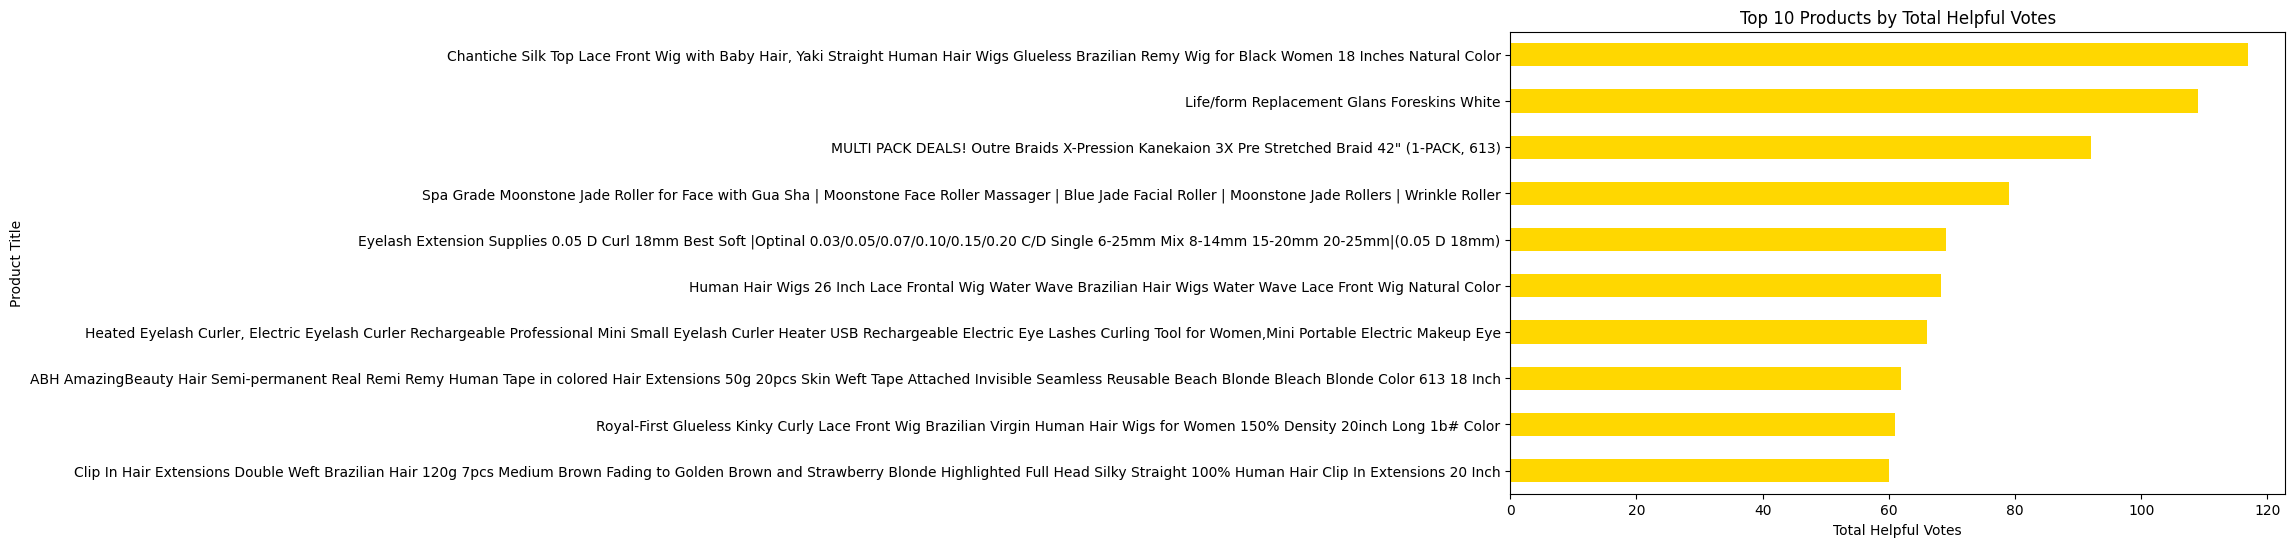

In [83]:
# Select the top 10 products with the highest average helpful votes.
top_helpful = amazon_df.groupby('product_title')['helpful_vote'].mean().nlargest(10).sort_values(ascending=True)
top_helpful.plot(kind='barh', figsize=(10, 6), color='gold')
plt.title('Top 10 Products by Total Helpful Votes')
plt.xlabel('Total Helpful Votes')
plt.ylabel('Product Title')
plt.show()

<b>High Customer Engagement:</b> Products with many helpful votes, show strong customer satisfaction. This feedback can be used to promote these products and build trust with potential buyers.<br>

<b>Demand for Beauty Products:</b> The top 10 products are mostly beauty and personal care items, indicating a strong demand in this category. Retailers can focus on this trend in their marketing strategies.

**e) Correlation Heatmap of Rating, Helpful Votes, Average Rating, and Text Word Count**

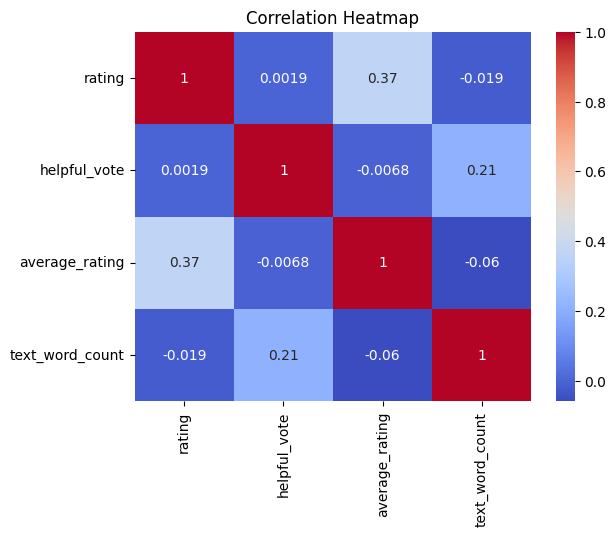

In [84]:
# Calculate the correlation matrix for selected columns: 'rating', 'helpful_vote', 'average_rating', 'text_word_count'
correlation = amazon_df[['rating', 'helpful_vote', 'average_rating', 'text_word_count']].corr()
# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<b>Rating and Average Rating: </b>The moderate positive correlation (0.37) suggests that as individual ratings increase, the average rating tends to increase too.

<b>Helpful Vote and Text Word Count:</b> The weak positive correlation (0.21) indicates that longer reviews might receive slightly more helpful votes.

<b>Other Pairs:</b> The rest of the correlations are very weak or near zero, suggesting almost no linear relationship between those pairs of variables.

**f) Top Active Users based on count of leaving review for products**

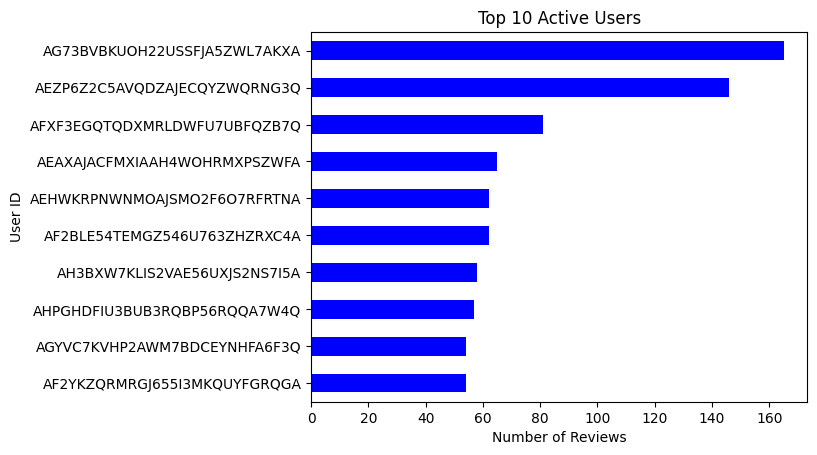

In [85]:
top_users = amazon_df['user_id'].value_counts().head(10)

# Creating a column chart
top_users.plot(kind='barh', color='blue', title='Top 10 Active Users')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

The "Top 10 Active Users" chart reveals that the top reviewer (AG73BVBKUOH22USSFLJA5ZWL7AKXA) contributed significantly more reviews (~160) compared to others, highlighting a steep drop-off in engagement among the top contributors. This suggests a few users dominate the review activity, emphasizing their critical role in community participation and potential for further engagement strategies.

**g) Helpful Votes by Top Users**

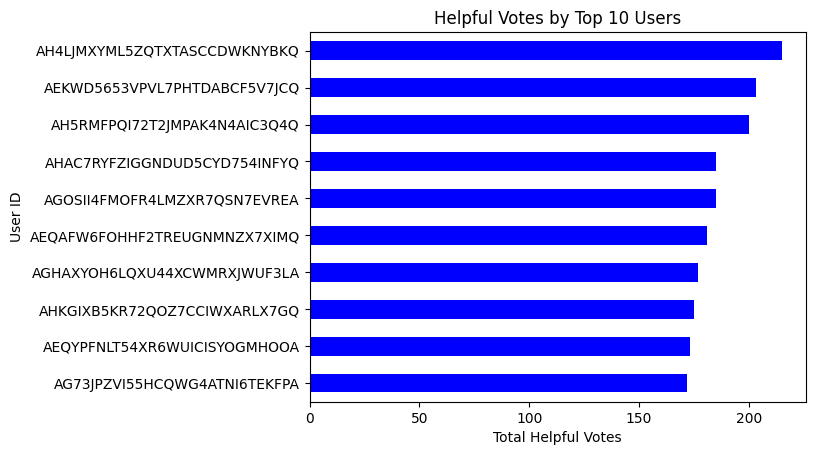

In [86]:
top_users_helpful_votes = amazon_df.groupby('user_id')['helpful_vote'].sum().sort_values(ascending=False).head(10)

# Creating a column chart
top_users_helpful_votes.plot(kind='barh', color='blue', title='Helpful Votes by Top 10 Users')
plt.xlabel('Total Helpful Votes')
plt.ylabel('User ID')
plt.gca().invert_yaxis()  # Ensures the top user appears at the top
plt.show()

The "Helpful Votes by Top 10 Users" chart highlights that the top user (AH4LJMXYML5ZQTXTASCCDWKNYBKQ) has received significantly more helpful votes (~210) compared to others, indicating their strong influence in the community. The gradual drop-off in votes among the remaining top users suggests varying levels of impact, with the top contributors playing a critical role in providing valuable feedback that resonates with the audience

**h) User Contribution Over Time**

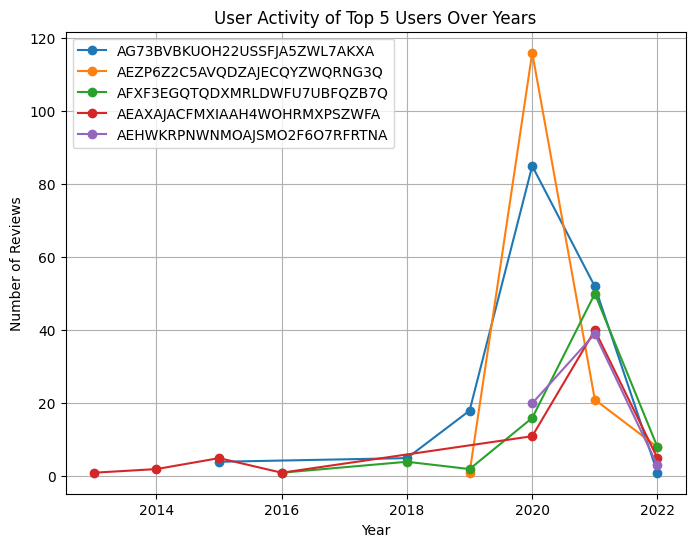

In [87]:
# Group by user_id and year, then count reviews
user_activity = amazon_df.groupby(['user_id', 'year']).size().reset_index(name='review_count')

# Get the top 5 users
top_users = amazon_df['user_id'].value_counts().nlargest(5).index

# Filter for the top users
top_user_activity = user_activity[user_activity['user_id'].isin(top_users)]

# Create the plot
plt.figure(figsize=(8,6))
for user in top_users:
    user_data = top_user_activity[top_user_activity['user_id'] == user]
    plt.plot(user_data['year'], user_data['review_count'], marker='o', label=user)

plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('User Activity of Top 5 Users Over Years')
plt.legend()
plt.grid(True)
plt.show()

The "User Activity of Top 5 Users Over Years" chart reveals a notable spike in reviews from 2019 to 2020, followed by a sharp decline post-2020. This surge in activity coincides with the onset of the COVID-19 pandemic, which likely influenced increased online shopping and engagement as people stayed home. The subsequent drop in reviews after 2020 could reflect the easing of pandemic restrictions, shifting consumer behavior, or reduced promotional activities, signaling a return to pre-pandemic engagement levels.

<b>i) Pairplot of Rating, Helpful Votes, Average Rating, and Text Word Count</b>

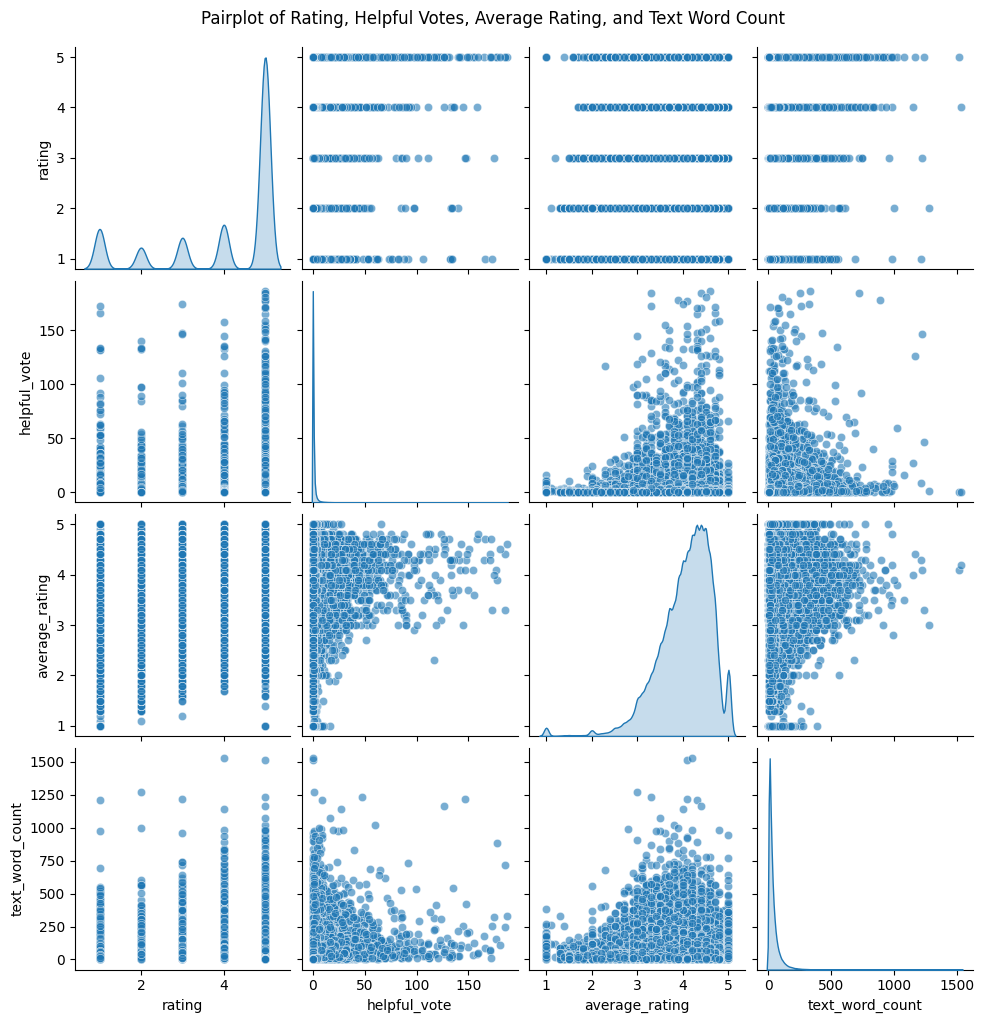

In [88]:
# Select the features you want to visualize
selected_columns = ['rating', 'helpful_vote', 'average_rating', 'text_word_count']

# Create a pairplot
sns.pairplot(amazon_df[selected_columns], diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.6})

# Add a title to the plot
plt.suptitle('Pairplot of Rating, Helpful Votes, Average Rating, and Text Word Count', y=1.02)
plt.show()

<b>Positive Reviews are More Valuable:</b><br>
Reviews with higher ratings (4 and 5 stars) tend to receive more helpful votes, suggesting that positive reviews are considered more useful by customers. This highlights the importance of positive feedback for product credibility and customer decision-making.<br><br>

<b>Longer Reviews are Perceived as More Helpful:</b><br>
Longer reviews tend to receive more helpful votes, indicating that customers find detailed feedback more valuable. This suggests that reviews with more comprehensive information are more likely to assist future buyers in making informed decisions.<br><br>

<b>High Consistency in Positive Ratings:</b><br>
There is a clear clustering of high ratings (4 and 5 stars) and corresponding average ratings, which indicates that most products tend to receive consistent, positive feedback. This suggests that products with high ratings are generally well-received by customers, fostering trust in their quality.<br>

**WORD CLOUD OF POSITIVE SENTIMENT**

In [89]:
#pip install wordcloud

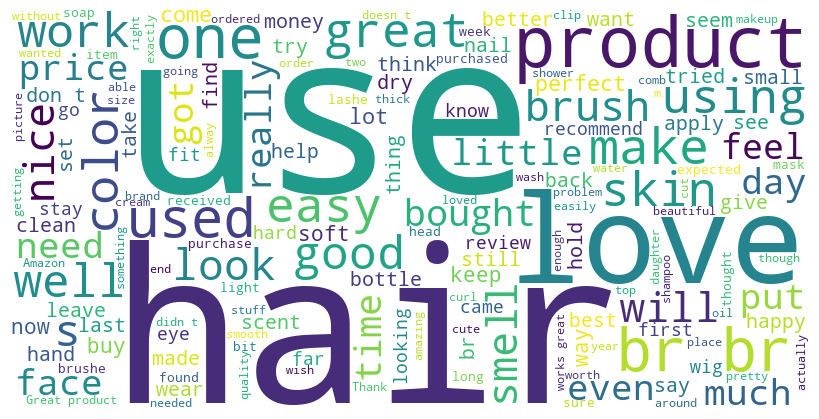

In [90]:
from wordcloud import WordCloud, STOPWORDS

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(text)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Example usage (replace with your actual text field)
text_for_wordcloud = " ".join(amazon_df['text'].astype(str)) # Combine all text reviews
create_wordcloud(text_for_wordcloud)

<b>Common Themes:</b> The word cloud highlights frequently mentioned words, indicating common themes and sentiments in product reviews. For instance, words like "love," "easy," "great," "good," and "recommend" suggest positive feedback and satisfaction.

<b>Product Features:</b> Words such as "hair," "color," "brush," "skin," "shampoo," and "mask" point to specific product features or types that users frequently discuss.

<b>User Experience:</b> Terms like "use," "try," "apply," "buy," and "price" reflect actions and considerations important to users, emphasizing their experiences with the products.

**WORD CLOUD OF NEGATIVE SENTIMENT**

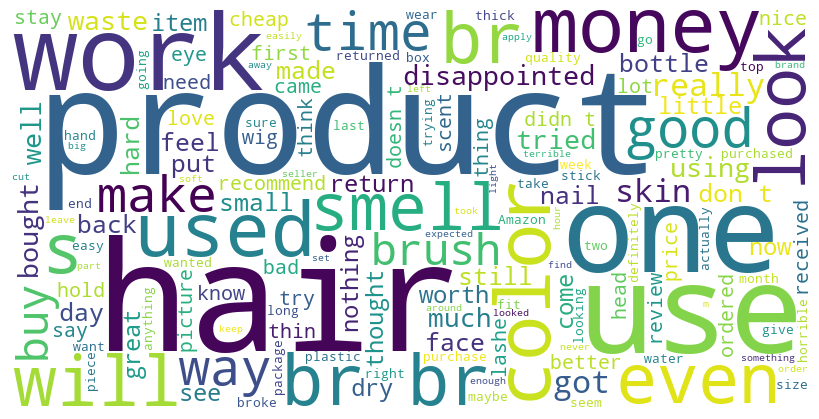

In [91]:
def create_negative_wordcloud(df):
    # Filter for negative reviews (e.g., ratings 1 or 2)
    negative_reviews = df[df['rating'] <= 2]
    negative_text = " ".join(negative_reviews['text'].astype(str))

    stopwords = set(STOPWORDS)
    # Add more stop words specific to the context if needed


    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(negative_text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

create_negative_wordcloud(amazon_df)

<b>Common Issues: </b>The frequent appearance of words like "product," "used," "work," and "money" suggests that many users have concerns about the efficacy and value of the products.

<b>Specific Complaints:</b> Terms like "hair," "color," "smell," and "brush" point to specific aspects of products that users might be dissatisfied with.

<b>Sentiment Indicators: </b>Words like "disappointed" and "return" directly express negative sentiments and actions taken by users in response to their dissatisfaction.

**NATURAL LANGUAGE PROCESSING**

**1. Text Representation**

In [92]:
#pip install nltk

In [93]:
#Import Necessary Libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')  # Download NLTK stopwords
# Download the punkt_tab data
nltk.download('punkt_tab') # This line is added to download the necessary punkt_tab data for sentence tokenization
nltk.download('averaged_perceptron_tagger', force=True)
nltk.download('punkt')         # For word_tokenize

nltk.download('wordnet')       # For WordNetLemmatizer
nltk.download('omw-1.4')       # For lemmatizer synonyms
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package aver

True

In [94]:
amazon_df['text'] = amazon_df['text'].fillna("").astype(str)

In [95]:
# Import necessary libraries
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Initialize the lemmatizer and stopwords list
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to map POS tags for lemmatizer
def get_wordnet_pos(word):
    """Map POS tag to first character accepted by lemmatizer."""
    from nltk.corpus.reader.wordnet import VERB, ADJ, NOUN, ADV
    from nltk import pos_tag

    tag = pos_tag([word])[0][1][0].upper()  # Get first character of POS tag
    tag_dict = {'J': ADJ, 'V': VERB, 'N': NOUN, 'R': ADV}
    return tag_dict.get(tag, NOUN)  # Default to noun if tag is not found

# Pre-processing function with lemmatizer
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lower case and remove stopwords
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalpha()]

    # Lemmatization with POS tagging
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    return " ".join(tokens)

In [96]:
# Apply the pre-processing function to the 'text' column
amazon_df['processed_text'] = amazon_df['text'].apply(preprocess_text)

In [97]:
# Display the first few rows
print(amazon_df[['text', 'processed_text']].head(5))

                                                text  \
0  This spray is really nice. It smells really go...   
1  This product does what I need it to do, I just...   
2                          Smells good, feels great!   
3                                     Felt synthetic   
4                                            Love it   

                                      processed_text  
0  spray really nice smell really good go really ...  
1  product need wish odorless soft coconut smell ...  
2                              smell good feel great  
3                                     felt synthetic  
4                                               love  


<b>Stop-word Removal:</b> I used nltk's stopwords list to remove common words (like "the", "and", "in", etc.) from the text. This helps reduce unnecessary noise in the data and focuses on the meaningful words.<br><br>
<b>Lower Casing: </b>All tokens (words) are converted to lowercase to ensure uniformity and avoid treating the same word in different cases as separate words.<br><br>
<b>Lemmatization::</b> I used NLTK’s WordNetLemmatizer to reduce words to their base or dictionary form (e.g., "running" becomes "run", "better" becomes "good").<br><br>
<b>Tokenization:</b> I used NLTK’s word_tokenize to split the text into individual words (tokens) for further analysis.<br><br>
<b>Part-of-Speech (POS) Tagging:</b>
Before lemmatizing the words, I used POS tagging to identify the grammatical role of each word (e.g., noun, verb, adjective) and guide the lemmatizer in choosing the correct form. For instance, "better" is lemmatized as "good" when recognized as an adjective but may be lemmatized differently when used as a verb.

**2.Label the Sentiment using 'rating' column**

In [98]:
# # Label the sentiment based on the rating
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment labeling
amazon_df['rating_sentiment'] = amazon_df['rating'].apply(label_sentiment) 

# Check the new column
amazon_df[['rating', 'rating_sentiment']].head(10)

,rating,rating_sentiment
0,5,positive
1,4,positive
2,5,positive
3,1,negative
4,5,positive
5,4,positive
6,5,positive
7,3,neutral
8,5,positive
9,5,positive


<b>3. Label the sentiment using 'VADER'</b>

In [99]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the VADER sentiment score (compound)
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Return the compound score

# Apply VADER Sentiment Analysis to the 'processed_text' column
amazon_df['vader_sentiment'] = amazon_df['processed_text'].apply(get_vader_sentiment)

In [100]:
# Function to classify VADER Sentiment based on compound score
def classify_vader_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply classification to 'vader_sentiment'
amazon_df['vader_sentiment_label'] = amazon_df['vader_sentiment'].apply(classify_vader_sentiment)

In [101]:
amazon_df[['rating', 'rating_sentiment','vader_sentiment','vader_sentiment_label']].head(10)

,rating,rating_sentiment,vader_sentiment,vader_sentiment_label
0,5,positive,0.7846,positive
1,4,positive,0.7717,positive
2,5,positive,0.7906,positive
3,1,negative,0.0000,neutral
4,5,positive,0.6369,positive
5,4,positive,0.0000,neutral
6,5,positive,0.8481,positive
7,3,neutral,0.3612,positive
8,5,positive,0.9883,positive
9,5,positive,0.9590,positive


<b>4. Visualize the Distribution of rating based sentiment and VADER Sentiment</b>

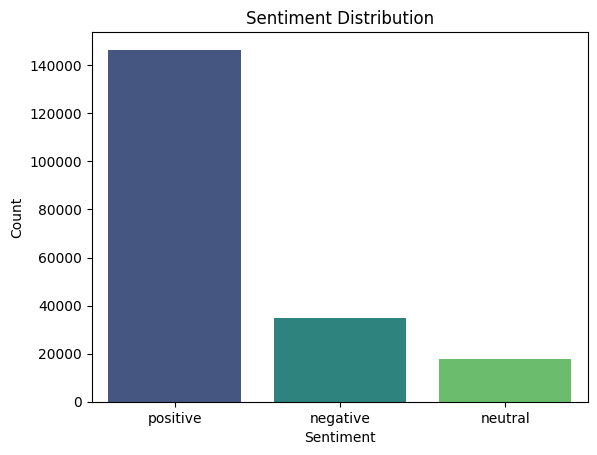

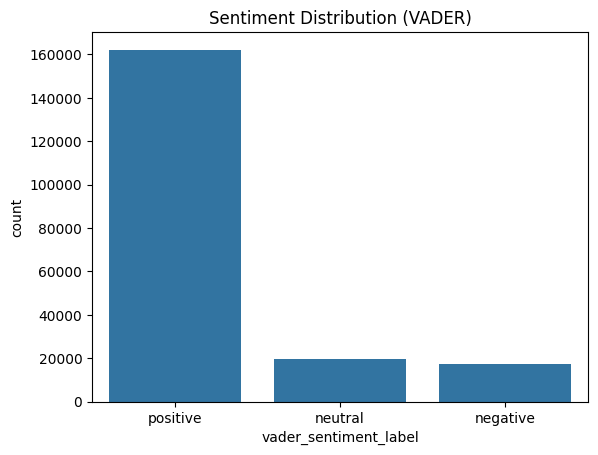

In [102]:
# # Plot sentiment distribution
sns.countplot(data=amazon_df, x='rating_sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize the sentiment distribution based on VADER Sentiment
sns.countplot(x='vader_sentiment_label', data=amazon_df)
plt.title('Sentiment Distribution (VADER)')
plt.show()


**5. TextBlob Sentiment Analysis**

In [103]:
#pip install textblob

In [104]:
from textblob import TextBlob

In [105]:
# Add polarity and subjectivity scores
amazon_df['polarity'] = amazon_df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
amazon_df['subjectivity'] = amazon_df['processed_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

**6. Visualize Polarity and Subjectivity**

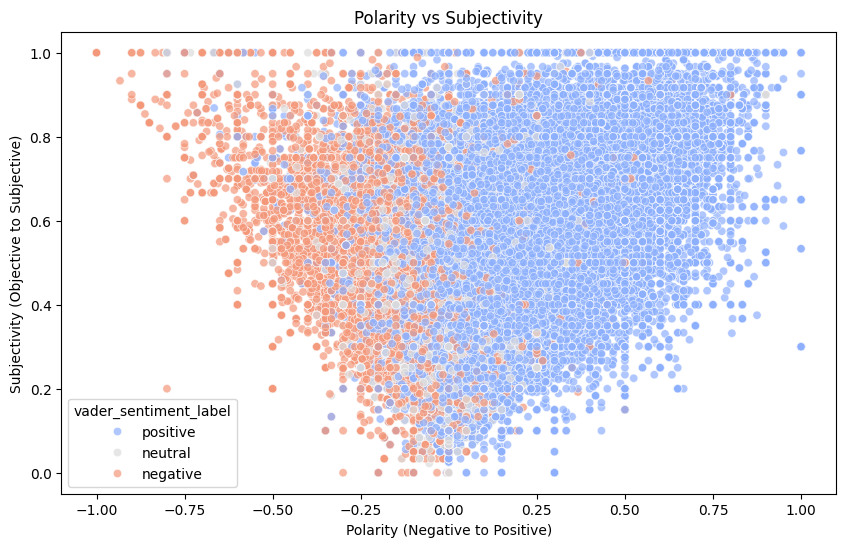

In [106]:
# # Scatter plot for polarity vs subjectivity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_df, x='polarity', y='subjectivity', hue='vader_sentiment_label', palette='coolwarm', alpha=0.7)
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity (Negative to Positive)')
plt.ylabel('Subjectivity (Objective to Subjective)')
plt.show()

<b>Polarity:</b> Measures the positivity or negativity of a sentiment. Higher polarity values indicate more positive sentiments, while lower values indicate more negative sentiments.

<b>Subjectivity:</b> Measures how subjective or objective a sentiment is. Higher subjectivity values indicate more subjective sentiments, while lower values indicate more objective sentiments.

<b>Relationship:</b> The plot shows a visual distribution of how sentiments vary in terms of their polarity and subjectivity. Positive sentiments are generally clustered together, while negative sentiments are more dispersed.<br><br>
Overall, the plot shows a balanced distribution of polarity and subjectivity, with a slightly higher concentration of positive sentiments.

**7. Sentiment Analysis Over Time**

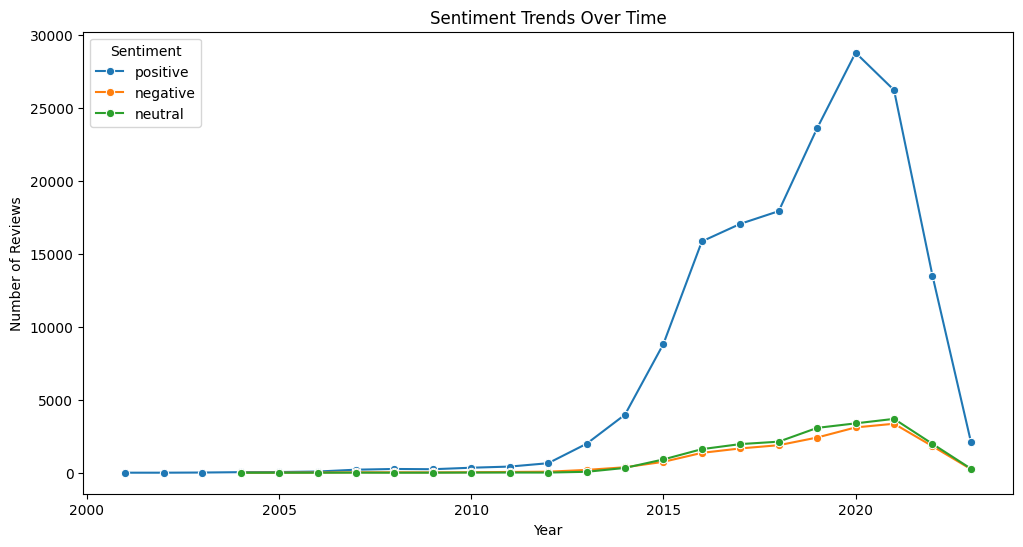

In [107]:
# # Group data by year and calculate sentiment distribution
sentiment_over_time = amazon_df.groupby(['year', 'vader_sentiment_label']).size().reset_index(name='count')

# Plot sentiment trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_over_time, x='year', y='count', hue='vader_sentiment_label', marker='o', palette='tab10')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()

The "Sentiment Trends Over Time" plot shows a sharp rise in positive, neutral, and negative reviews around 2020, likely driven by the COVID-19 pandemic, which led to increased online engagement. Positive reviews peaked at over 25,000, while neutral and negative reviews also grew, reflecting changing customer expectations and frustrations. After 2020, all sentiments declined, possibly due to shifts in consumer behavior and market saturation. These trends highlight the impact of external events like COVID-19 on customer sentiment and feedback.

**8. Average Polarity by Sentiment**

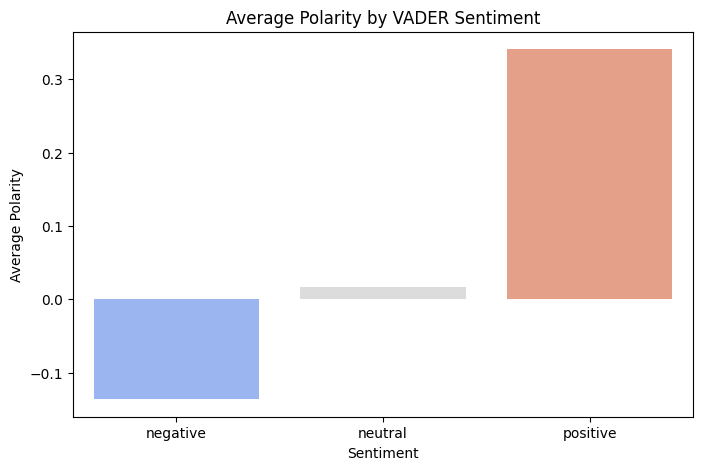

In [108]:
# Group by vader_sentiment and calculate the mean polarity
avg_polarity = amazon_df.groupby('vader_sentiment_label')['polarity'].mean().reset_index()

# Bar plot for average polarity by sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_polarity, x='vader_sentiment_label', y='polarity', palette='coolwarm')
plt.title('Average Polarity by VADER Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Polarity')
plt.show()

<b>Sentiment Distribution:</b> The polarity scores align with expected sentiment trends, with negative sentiment slightly below -0.1, neutral sentiment near 0, and positive sentiment above 0.3, showcasing a clear differentiation in tone.<br><br>

<b>Tone Analysis: </b>Positive sentiments exhibit stronger positivity, while negative sentiments are moderately negative, reflecting the overall emotional tone captured by VADER analysis. Neutral sentiments maintain a balanced tone.

**9. Split Data into Training and Testing Sets**

In [110]:
#Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Take a 10% sample of the dataset for demonstration
amazon_sampled = amazon_df.sample(frac=0.05, random_state=42).reset_index(drop=True)

# TF-IDF Vectorization for the sampled text data
tfidf = TfidfVectorizer(max_features=1000)  # Convert processed text into feature vectors
X_tfidf = tfidf.fit_transform(amazon_sampled['processed_text'])

# Define the target variable (VADER sentiment labels)
y = amazon_sampled['vader_sentiment_label']  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Check for class imbalance
print("Class Distribution in Training Set:")
print(y_train.value_counts())

# Handle class imbalance with class weights
class_weights = compute_class_weight(
    class_weight='balanced',  # Adjust weights inversely proportional to class frequencies
    classes=np.unique(y_train),
    y=y_train
)
weights_dict = dict(zip(np.unique(y_train), class_weights))
print("Class Weights:", weights_dict)



Class Distribution in Training Set:
vader_sentiment_label
positive    6479
neutral      763
negative     723
Name: count, dtype: int64
Class Weights: {'negative': 3.672199170124481, 'neutral': 3.4796854521625162, 'positive': 0.4097854607192468}


The class distribution in the training set shows a significant imbalance, with the majority of samples labeled as "positive" (6479), while "neutral" (763) and "negative" (723) are underrepresented.

**10. Train a Sentiment Analysis Model**

<b>MODEL 1. Logistic Regression</b>

In [ ]:
# Train a Logistic Regression Model
lr_model = LogisticRegression(class_weight=weights_dict, random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = lr_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[ 131   34   16]
 [  25  163    3]
 [  87   96 1437]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.54      0.72      0.62       181
     neutral       0.56      0.85      0.67       191
    positive       0.99      0.89      0.93      1620

    accuracy                           0.87      1992
   macro avg       0.69      0.82      0.74      1992
weighted avg       0.90      0.87      0.88      1992


Accuracy Score:
0.8689759036144579


<b>Overall Accuracy: </b>The model achieves 86.9% accuracy, with strong performance for the majority "positive" class (precision: 0.99, recall: 0.89).<br>

<b>Class Imbalance:</b> Performance for "negative" (precision: 0.54, recall: 0.72) and "neutral" (precision: 0.56, recall: 0.85) is moderate, indicating struggles with minority classes.

<b>MODEL 2-Random Forest Classifier </b> 

In [117]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest Classifier with class weights
rf_model = RandomForestClassifier(class_weight=weights_dict, random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  92   59   30]
 [   5  178    8]
 [  63  233 1324]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.57      0.51      0.54       181
     neutral       0.38      0.93      0.54       191
    positive       0.97      0.82      0.89      1620

    accuracy                           0.80      1992
   macro avg       0.64      0.75      0.66      1992
weighted avg       0.88      0.80      0.82      1992

Accuracy Score:
0.8002008032128514


<b>Overall Accuracy:</b> The model achieves 80.0% accuracy, but this is lower than the logistic regression model, particularly due to challenges with minority classes.<br>

<b>Class Performance:</b> While "positive" class performance is strong (precision: 0.97, recall: 0.82), the "negative" and "neutral" classes show weaker results, especially "neutral" with precision at 0.38.

<b>MODEL 3- Random Forest Classifier with SMOTE Resampling for Class Imbalance</b>

In [127]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train model on the resampled data
rf_model_smote = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)
# Predictions
y_pred = rf_model_smote.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 100   27   54]
 [  14  158   19]
 [  41   41 1538]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.55      0.60       181
     neutral       0.70      0.83      0.76       191
    positive       0.95      0.95      0.95      1620

    accuracy                           0.90      1992
   macro avg       0.77      0.78      0.77      1992
weighted avg       0.90      0.90      0.90      1992

Accuracy Score:
0.9016064257028112


<b>Overall Performance: </b>The model achieved an impressive 90.16% accuracy, significantly improving performance compared to the previous models, indicating effective handling of class imbalance via SMOTE.<br>

<b>Class Performance: </b>"Positive" class shows excellent precision (0.95) and recall (0.95), while "negative" and "neutral" classes have more balanced but moderate performance, especially "negative" (precision: 0.65, recall: 0.55).<br>

<b>Class Balance:</b> The model's balanced performance across all classes suggests that SMOTE helped mitigate the impact of class imbalance, as evidenced by improved recall for the "negative" and "neutral" classes.

<b>MODEL 4- Optimized Random Forest Classifier Using Grid Search and SMOTE for Class Imbalance </b>

In [120]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf_model_grid = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model_grid, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Best model and parameters
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Cross-validation Score for Random Forest: {grid_search_rf.best_score_}")

# Predict using the best model
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy for Best Random Forest: {accuracy_score(y_test, y_pred_rf_best)}")
print(f"Classification Report for Best Random Forest:\n{classification_report(y_test, y_pred_rf_best)}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Score for Random Forest: 0.9713436341037605
Accuracy for Best Random Forest: 0.9091365461847389
Classification Report for Best Random Forest:
              precision    recall  f1-score   support

    negative       0.68      0.59      0.63       181
     neutral       0.72      0.82      0.77       191
    positive       0.96      0.96      0.96      1620

    accuracy                           0.91      1992
   macro avg       0.79      0.79      0.78      1992
weighted avg       0.91      0.91      0.91      1992



The model achieved an accuracy of 90.91%, with the "positive" class performing excellently (precision: 0.96, recall: 0.96). For "negative" and "neutral" classes, the model shows decent performance, with recall for "neutral" at 0.82, and a balanced precision and recall for "negative" (0.68, 0.59), highlighting the challenges of predicting the minority classes but still providing valuable predictions.

<b>MODEL 5- Sentiment Classification Using Naive Bayes </b>

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import hstack, csr_matrix

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Fit the Naive Bayes model on the training data
nb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_nb)}")

Accuracy: 0.8258032128514057
Classification Report:
              precision    recall  f1-score   support

    negative       0.39      0.71      0.50       181
     neutral       0.57      0.50      0.53       191
    positive       0.95      0.88      0.91      1620

    accuracy                           0.83      1992
   macro avg       0.64      0.70      0.65      1992
weighted avg       0.86      0.83      0.84      1992



<b>Positive Class: </b>The model performs very well for the positive class with a precision of 0.95 and recall of 0.88, resulting in a strong f1-score of 0.91.<br><br>
<b>Negative Class:</b> The model struggles with the negative class, having a low precision of 0.39, but relatively higher recall of 0.71, suggesting it’s better at identifying negative sentiment but with many false positives.<br><br>
<b>Neutral Class:</b> The neutral class also has a precision of 0.57 and recall of 0.50, indicating a fairly weak performance, but it’s somewhat better than the negative class in precision.

<b>MODEL 6- Support Vector Machine (SVM) Model for Sentiment Analysis Using Resampled Data</b>

In [121]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(f"Accuracy for SVM: {accuracy_score(y_test, y_pred_svm)}")
print(f"Classification Report for SVM:\n{classification_report(y_test, y_pred_svm)}")

Accuracy for SVM: 0.8755020080321285
Classification Report for SVM:
              precision    recall  f1-score   support

    negative       0.79      0.34      0.47       181
     neutral       0.87      0.42      0.57       191
    positive       0.88      0.99      0.93      1620

    accuracy                           0.88      1992
   macro avg       0.85      0.58      0.66      1992
weighted avg       0.87      0.88      0.85      1992



<b>Positive Class:</b> The model performs excellently on the positive class with a high precision of 0.88 and recall of 0.99, yielding an f1-score of 0.93. It accurately classifies the majority class.<br><br>
<b>Negative Class: </b>The negative class has moderate precision (0.79) but low recall (0.34), meaning it struggles to identify negative sentiment correctly, resulting in many false negatives.<br><br>
<b>Neutral Class:</b> The neutral class shows good precision (0.87) but low recall (0.42), indicating that while the model correctly labels neutral instances, it misses many neutral cases in its predictions.

<b>MODEL 7- XGBoost Model for Multi-Class Sentiment Analysis with Resampled Training Data</b>

In [ ]:
# pip install xgboost

In [122]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numeric
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Check the transformed labels
print(y_train_encoded[:10])  # Print first 10 labels after encoding

[2 0 2 2 2 2 1 2 2 2]


In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Train the model on the encoded labels
xgb_model.fit(X_train_resampled, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original labels (if needed)
y_pred_xgb_original = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
print(f"Accuracy for XGBoost: {accuracy_score(y_test_encoded, y_pred_xgb)}")
print(f"Classification Report for XGBoost:\n{classification_report(y_test_encoded, y_pred_xgb)}")

Accuracy for XGBoost: 0.892570281124498
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       181
           1       0.63      0.92      0.75       191
           2       0.98      0.92      0.95      1620

    accuracy                           0.89      1992
   macro avg       0.74      0.83      0.77      1992
weighted avg       0.91      0.89      0.90      1992



<b>Positive Class (Label 2):</b> The model performs excellently on the positive class with a high precision of 0.98 and recall of 0.92, yielding an f1-score of 0.95. This suggests that it classifies positive sentiment very well with minimal false positives and false negatives.<br><br>
<b>Neutral Class (Label 1): </b>The neutral class has moderate precision (0.63) and high recall (0.92), resulting in an f1-score of 0.75. While it detects most neutral cases, it may also produce some false positives.<br><br>
<b>Negative Class (Label 0): </b>The negative class has lower performance with precision of 0.60 and recall of 0.66, giving it an f1-score of 0.63, meaning it performs worse on identifying negative sentiment compared to the other classes.

**11. Model Evaluation**

In [138]:
# Predict sentiment for a new review
new_review = "The product is okay.Works as expected"
new_review_processed = preprocess_text(new_review)

# Convert the processed review to TF-IDF features
new_review_tfidf = tfidf.transform([new_review_processed])

# Predict the sentiment
predicted_sentiment = best_rf_model.predict(new_review_tfidf)

print("\nPrediction for New Review:")
print(f"Review: \"{new_review}\"")
print(f"Predicted Sentiment: {predicted_sentiment[0]}")


Prediction for New Review:
Review: "The product is okay.Works as expected"
Predicted Sentiment: neutral


<b>Analysis of products based on sentiment of review</b>

<b>1 ) Sentiment Distribution Based on Verified Purchase Status</b>

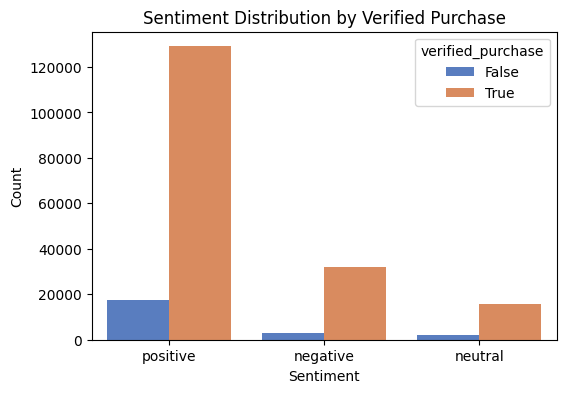

In [143]:
# Plot the sentiment distribution based on verified purchase status
plt.figure(figsize=(6,4))
sns.countplot(data=amazon_df, x='rating_sentiment', hue='verified_purchase', palette='muted')
plt.title('Sentiment Distribution by Verified Purchase')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<b>Higher Engagement and Trust in Verified Purchasers:</b> Verified purchasers provide more feedback across all sentiment categories (positive, negative, and neutral), making their reviews more valuable and trusted by potential buyers. This reflects their higher investment in the product, leading to more genuine and comprehensive feedback.

<b>2) Identifying the User with the Most Reviews and Their Average Sentiment Score</b>

In [150]:
# Group by user_id to count the number of reviews and calculate average sentiment score
user_review_sentiment = amazon_df.groupby('user_id').agg(
    review_count=('text', 'count'),  # Count number of reviews
    avg_vader_sentiment=('vader_sentiment', 'mean')  # Calculate average sentiment score
).reset_index()

# Find the user with the most reviews
top_reviewer = user_review_sentiment.loc[user_review_sentiment['review_count'].idxmax()]

# Output the result
print(f"User ID with most reviews: {top_reviewer['user_id']}")
print(f"Number of reviews: {top_reviewer['review_count']}")
print(f"Average sentiment score: {top_reviewer['avg_vader_sentiment']}")

User ID with most reviews: AG73BVBKUOH22USSFJA5ZWL7AKXA
Number of reviews: 165
Average sentiment score: 0.6438993939393939


This user is highly active and generally positive in their feedback, which can be useful for understanding customer sentiment and loyalty. Their frequent reviews and positive sentiment could indicate that they are a valuable customer, possibly influencing other buyers or the brand’s reputation

<b>3) Top 20 Products with the Most Negative Sentiment Reviews</b>

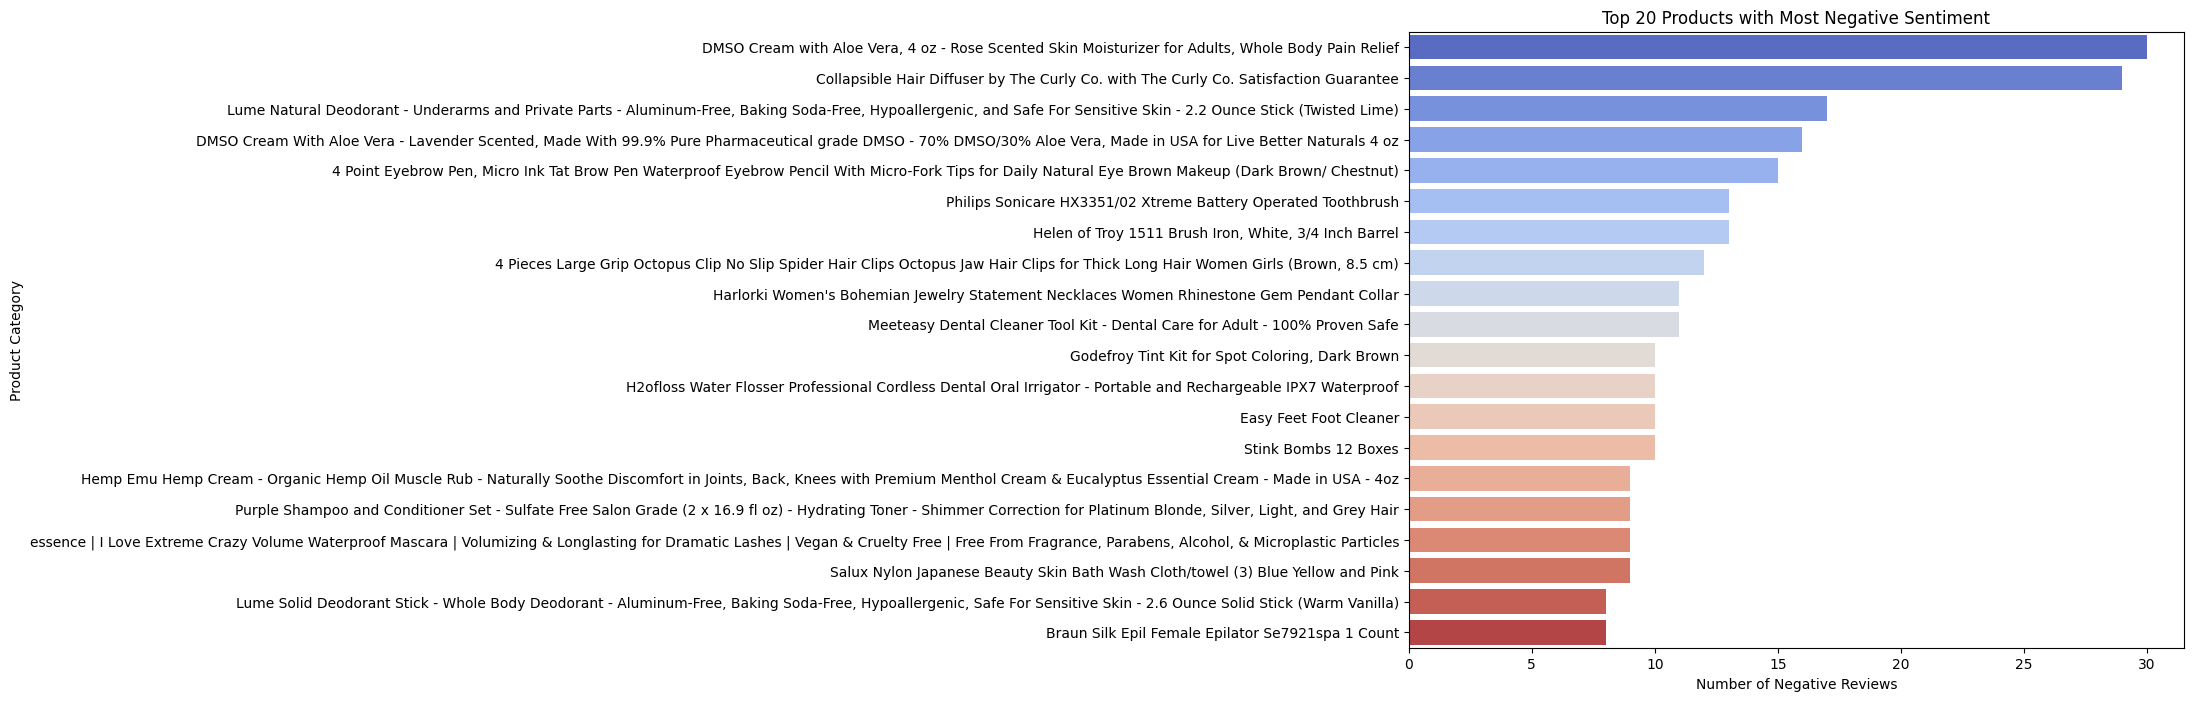

                                          product_title  negative_count
1258  DMSO Cream with Aloe Vera, 4 oz - Rose Scented...              30
1143  Collapsible Hair Diffuser by The Curly Co. wit...              29
2454  Lume Natural Deodorant - Underarms and Private...              17
1257  DMSO Cream With Aloe Vera - Lavender Scented, ...              16
333   4 Point Eyebrow Pen, Micro Ink Tat Brow Pen Wa...              15
3149  Philips Sonicare HX3351/02 Xtreme Battery Oper...              13
2029  Helen of Troy 1511 Brush Iron, White, 3/4 Inch...              13
330   4 Pieces Large Grip Octopus Clip No Slip Spide...              12
1992  Harlorki Women's Bohemian Jewelry Statement Ne...              11
2644  Meeteasy Dental Cleaner Tool Kit - Dental Care...              11


In [152]:
# Filter for negative sentiment: vader_sentiment < -0.5 (you can adjust the threshold as needed)
negative_reviews_df = amazon_df[amazon_df['vader_sentiment'] < -0.5]

# Group by product title and count the number of negative reviews for each product
negative_sentiment_count = negative_reviews_df.groupby('product_title').size().reset_index(name='negative_count')

# Sort products by the count of negative sentiment reviews in descending order
negative_sentiment_count = negative_sentiment_count.sort_values(by='negative_count', ascending=False)

# Visualize the top products with the most negative sentiment
plt.figure(figsize=(10,8))
sns.barplot(x='negative_count', y='product_title', data=negative_sentiment_count.head(20), palette='coolwarm')
plt.title("Top 20 Products with Most Negative Sentiment")
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Product Category')
plt.show()

# Display the top 10 products with the most negative sentiment
print(negative_sentiment_count.head(10))

<b>Priority for Quality Improvement:</b> Products with the highest negative sentiment, such as "DMSO Cream with Aloe Vera" and "Collapsible Hair Diffuser," should be prioritized for quality improvements and detailed customer feedback analysis to address common issues and enhance effectiveness.